In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

from sklearn import linear_model #линейные модели
from sklearn import metrics #метрики
from sklearn import preprocessing #предобработка
from sklearn.model_selection import train_test_split #разделение выборки

In [60]:
data = pd.read_csv('../data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


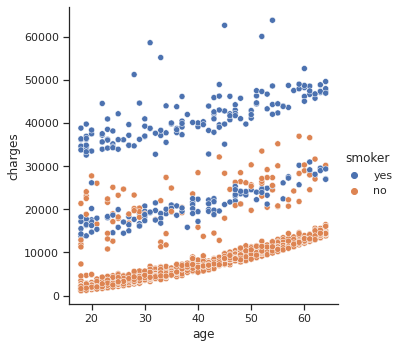

In [32]:
sns.relplot(x="age", y='charges', hue="smoker", data=data)

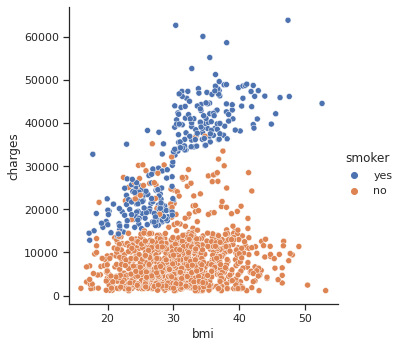

In [31]:
sns.relplot(x="bmi", y='charges', hue="smoker", data=data)

children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64

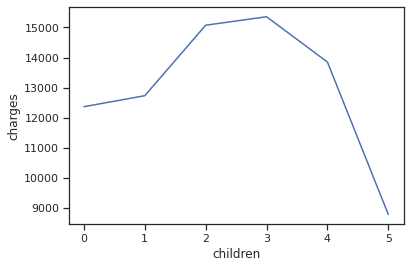

In [27]:
mean_kids = data.groupby(by='children')['charges'].mean()
sns.lineplot(data=mean_kids)
mean_kids

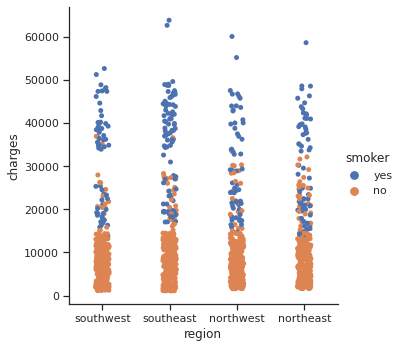

In [30]:
sns.catplot(x="region", y='charges', hue="smoker", data=data)

In [61]:
#кодируем бинарные категориальные признаки
data['smoker'] = data['smoker'].apply(lambda x: 0 if x == 'no' else 1)
data['sex'] = data['sex'].apply(lambda x: 0 if x == 'female' else 1)
#оставшиеся категориальные признаки кодируем с помощью OneHot
data = pd.get_dummies(data)
data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [62]:
features = data.drop('charges', axis=1).columns
X, y = data[features], data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print('Train:', X_train.shape)
print('Test:', X_test.shape)

Train: (1070, 9)
Test: (268, 9)


In [63]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [64]:
#Инициализируем объект класса линейная регрессия
lr = linear_model.LinearRegression()
#Обучаем модель - ищем параметры
lr.fit(X_train, y_train)
#Делаем предсказание для каждой из выборок
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.742
Train MAE: 4208
Train MAPE: 42


Test R^2: 0.784
Test MAE: 4181
Test MAPE: 47


In [65]:
print(np.round(lr.intercept_, 2))

-12390.8


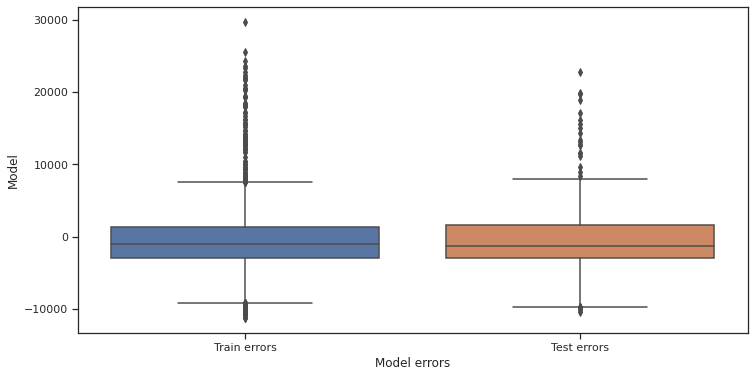

In [66]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура+координатная плоскость
#Ошибки модели на тренировочной выборке 
y_train_errors = y_train - y_train_pred
#Ошибки модели на тестовой выборке
y_test_errors = y_test - y_test_pred
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
    {'Train errors': y_train_errors, 
     'Test errors': y_test_errors
    }
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

In [67]:
predict_df.describe()

,Train errors,Test errors
count,1.070000e+03,268.000000
mean,-2.318786e-12,-219.240670
std,6.108400e+03,5802.973419
min,-1.134178e+04,-10512.582562
25%,-2.892382e+03,-2941.141589
50%,-9.742559e+02,-1242.934185
75%,1.276711e+03,1560.797841
max,2.975138e+04,22850.136498


In [70]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)
print(X_train_scaled_poly.shape)

(1070, 54)


In [71]:
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train)

y_train_predict = lr_poly.predict(X_train_scaled_poly)
y_test_predict = lr_poly.predict(X_test_scaled_poly)
print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.842
Train MAE: 2924
Train MAPE: 30


Test R^2: 0.866
Test MAE: 2756
Test MAPE: 30


In [72]:
print(lr_poly.coef_)

[-1.18253018e+17  3.24015014e+15  2.24521223e+16 -4.61872259e+16
  3.87641814e+14  4.21907144e+15  3.78808342e+15  3.55327964e+15
  5.11515381e+15  8.57600000e+03  8.36000000e+02  1.16800000e+03
 -1.64000000e+03  1.68000000e+02  1.18253018e+17  1.18253018e+17
  1.18253018e+17  1.18253018e+17 -4.89519881e+13  6.33000000e+02
 -1.21650000e+03  2.63000000e+02 -3.19119815e+15 -3.19119815e+15
 -3.19119815e+15 -3.19119815e+15 -9.67575000e+03  1.53037500e+03
  5.48245625e+04 -2.24521223e+16 -2.24521223e+16 -2.24521223e+16
 -2.24521223e+16 -2.07400000e+03 -2.24000000e+03  4.61872259e+16
  4.61872259e+16  4.61872259e+16  4.61872259e+16  2.32520388e+15
 -2.71284570e+15 -2.71284570e+15 -2.71284570e+15 -2.71284570e+15
  1.88160818e+15  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.31259620e+15  0.00000000e+00  0.00000000e+00  2.54739997e+15
  0.00000000e+00  9.85525808e+14]


In [73]:
#Инициализируем объект класса линейная регрессия с L1-регуляризацией 
lasso_lr_poly = linear_model.Lasso()
#Обучаем модель предсказывать логарифм целевого признака
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = lasso_lr_poly.predict(X_train_scaled_poly)
y_test_pred = lasso_lr_poly.predict(X_test_scaled_poly)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.842
Train MAE: 2889
Train MAPE: 29


Test R^2: 0.867
Test MAE: 2718
Test MAPE: 30


/home/russ174/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1292406126.123232, tolerance: 15443697.546846814
  model = cd_fast.enet_coordinate_descent(


In [74]:
print(lasso_lr_poly.coef_)

[ 3254.29444013  -497.77667434  5082.44296811  4579.96903719
 11174.5885881     92.27997327  -474.0824118    585.76537158
  -243.94757338  8291.3159849    776.44311147   834.79828593
 -1211.25190072   133.7834509  -1044.725423      -0.
  1169.28596708  1614.02590931    -0.           511.03215486
 -1132.38078219   266.01794461 -1221.18415878     0.
   239.00186822  -577.34015094 -8185.15426742  1294.30664583
 54733.92609325  3582.81956575  2403.95450092  -968.57471909
    -0.         -1670.63577613 -2056.02514315  1943.04187366
  1954.4503939      0.         -1061.93641958 -8575.11156654
    -0.          -592.75085202  -851.52193562  1359.94923273
   723.55006857     0.             0.             0.
    -0.             0.             0.             0.
     0.            -0.        ]


In [75]:
#Инициализируем объект класса линейная регрессия с L2-регуляризацией 
ridge_lr_poly = linear_model.Ridge()
#Обучаем модель предсказывать логарифм целевого признака
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
#Делаем предсказание для каждой из выборок
#Если обучили на логарифме, то от результата необходимо взять обратную функцию - экспоненту
y_train_pred = ridge_lr_poly.predict(X_train_scaled_poly)
y_test_pred = ridge_lr_poly.predict(X_test_scaled_poly)
#Выводим результирующие метрики
print_metrics(y_train, y_train_pred, y_test, y_test_pred)

Train R^2: 0.839
Train MAE: 2949
Train MAPE: 30


Test R^2: 0.863
Test MAE: 2861
Test MAPE: 31


In [76]:
print(ridge_lr_poly.coef_)

[ 3369.38386245  -457.59604061  3655.82413935  3198.89989857
  2682.62197133   199.05715111  -228.717235     191.94660928
  -162.28652539  7548.51142058   581.66782381   935.50427948
  -681.52086519   663.45387027  -450.92174702   438.63623056
  1406.72601433  1974.94336458  -457.59604061   947.62267378
  -902.74408745   739.02044241  -822.63208356   302.52583364
   351.60830856  -289.09809926 -4274.11806366  2734.55631801
 44541.21377369  3667.33801864  1719.64618126 -1249.79159857
  -481.36846198 -1314.96604775 -2172.72264458  2171.5603185
  1997.18187938   112.64828731 -1082.49058663  2682.62197133
    94.23317954  -208.05994804   535.71682279  2260.73191704
   199.05715111     0.             0.             0.
  -228.717235       0.             0.           191.94660928
     0.          -162.28652539]
